<a href="https://colab.research.google.com/github/ddperdana/Face-Detections/blob/main/Metode_Prediksi_LSTM_dan_Optimisasi_ADAM_untuk_memperkiraan_harga_emiten_saham_Bank_Rakyat_Indonesia_(BBRI_JK)_dengan_menunjukan_range_waktu_20_januari_2019_%E2%80%93_15_januari_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [3]:
# Load data harga saham BBRI.JK
data = pd.read_csv('/content/BBRI.JK.csv')

In [4]:
# Hapus kolom yang tidak digunakan
data.drop(['Date'], axis=1, inplace=True)

In [5]:
# Konversi data ke bentuk numpy array
dataset = data.values
dataset = dataset.astype('float32')

In [6]:
# Scaling data menjadi rentang antara 0 dan 1
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [7]:
# Membagi data menjadi training dan testing
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [8]:
# Membuat function untuk membuat data dalam bentuk array 2D (sample, timestep)
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [9]:
# Menentukan jumlah timestep (look_back)
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [10]:
# Membuat model LSTM
model = Sequential()
model.add(LSTM(100, input_shape=(look_back, 1)))
model.add(Dense(1))

In [11]:
# Compile model menggunakan optimisasi ADAM dan fungsi kerugian Mean Squared Error
model.compile(loss='mean_squared_error', optimizer='adam')

In [12]:
# Reshape data menjadi bentuk 3D (sample, timestep, feature)
trainX = np.reshape(trainX, (trainX.shape[0], look_back, 1))
testX = np.reshape(testX, (testX.shape[0], look_back, 1))

In [13]:
# Fitting model ke data training
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
690/690 - 4s - loss: nan - 4s/epoch - 6ms/step
Epoch 2/100
690/690 - 2s - loss: nan - 2s/epoch - 3ms/step
Epoch 3/100
690/690 - 1s - loss: nan - 1s/epoch - 2ms/step
Epoch 4/100
690/690 - 1s - loss: nan - 1s/epoch - 2ms/step
Epoch 5/100
690/690 - 1s - loss: nan - 1s/epoch - 2ms/step
Epoch 6/100
690/690 - 2s - loss: nan - 2s/epoch - 3ms/step
Epoch 7/100
690/690 - 2s - loss: nan - 2s/epoch - 2ms/step
Epoch 8/100
690/690 - 1s - loss: nan - 1s/epoch - 2ms/step
Epoch 9/100
690/690 - 1s - loss: nan - 1s/epoch - 2ms/step
Epoch 10/100
690/690 - 1s - loss: nan - 1s/epoch - 2ms/step
Epoch 11/100
690/690 - 1s - loss: nan - 1s/epoch - 2ms/step
Epoch 12/100
690/690 - 1s - loss: nan - 1s/epoch - 2ms/step
Epoch 13/100
690/690 - 1s - loss: nan - 1s/epoch - 2ms/step
Epoch 14/100
690/690 - 2s - loss: nan - 2s/epoch - 2ms/step
Epoch 15/100
690/690 - 2s - loss: nan - 2s/epoch - 3ms/step
Epoch 16/100
690/690 - 1s - loss: nan - 1s/epoch - 2ms/step
Epoch 17/100
690/690 - 1s - loss: nan - 1s/epoch 

In [14]:
# Melakukan prediksi pada data testing
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

10/10 [==============================] - 0s 2ms/step


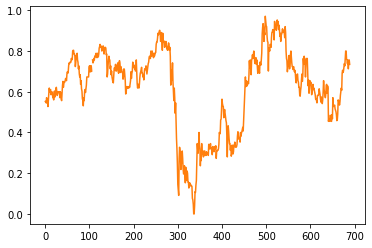

In [15]:
# Plot hasil prediksi pada data trainingnya
plt.plot(trainPredict)
plt.plot(trainY)
plt.show()

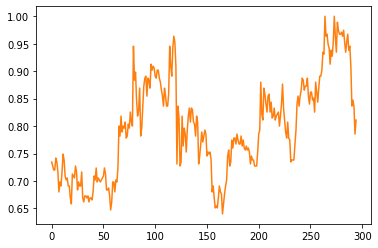

In [16]:
# Plot hasil prediksi pada data testing  by Ajang Rahmat
plt.plot(testPredict)
plt.plot(testY)
plt.show()